## Importing data using panadas

In [14]:
import pandas as pd
import numpy as np


df = pd.read_csv('final_data_with_language.csv')
df = df.drop('Unnamed: 0',axis=1)
df.head(10)


,id,title,author,text,label,total,Language
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...,eng
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",eng
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Why the Trut...,eng
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...,eng
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...,eng
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,Jackie Mason: Hollywood Would Love Trump if He...,eng
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1,Life: Life Of Luxury: Elton John’s 6 Favorite ...,eng
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,Benoît Hamon Wins French Socialist Party’s Pre...,eng
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0,Excerpts From a Draft Script for Donald Trump’...,eng
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,"A Back-Channel Plan for Ukraine and Russia, Co...",eng


## Displaying shape of a DataFrame

In [2]:
# shape of dataframe
df.shape  # (20800, 5) -> 20800 rows with 5 columns (id, title, author, text, and label)

(20800, 7)

## Getting information regarding DataFrame

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        20800 non-null  int64 
 1   title     20242 non-null  object
 2   author    18843 non-null  object
 3   text      20761 non-null  object
 4   label     20800 non-null  int64 
 5   total     20203 non-null  object
 6   Language  20800 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.1+ MB


## Checking null values

In [4]:
df.isnull().sum()

id             0
title        558
author      1957
text          39
label          0
total        597
Language       0
dtype: int64

## Replacing null values with blanck space

In [5]:
df = df.replace(np.nan, ' ')
df.shape

(20800, 7)

## After replacing NaN values 

In [6]:
df.head(15)

,id,title,author,text,label,total,Language
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...,eng
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",eng
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Why the Trut...,eng
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...,eng
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...,eng
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,Jackie Mason: Hollywood Would Love Trump if He...,eng
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,,Ever wonder how Britain’s most iconic pop pian...,1,Life: Life Of Luxury: Elton John’s 6 Favorite ...,eng
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,Benoît Hamon Wins French Socialist Party’s Pre...,eng
8,8,Excerpts From a Draft Script for Donald Trump’...,,Donald J. Trump is scheduled to make a highly ...,0,Excerpts From a Draft Script for Donald Trump’...,eng
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,"A Back-Channel Plan for Ukraine and Russia, Co...",eng


## Checking for NaN values one more time

In [7]:
df.isnull().sum()

id          0
title       0
author      0
text        0
label       0
total       0
Language    0
dtype: int64

## Checking info after removing NaN

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        20800 non-null  int64 
 1   title     20800 non-null  object
 2   author    20800 non-null  object
 3   text      20800 non-null  object
 4   label     20800 non-null  int64 
 5   total     20800 non-null  object
 6   Language  20800 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.1+ MB


## Remove other language data than English

In [9]:
df = df.loc[(df['Language'] == 'eng') | (df['Language'] == 'eng ')]
len(df)

20259

## Adding one more column in dataFrame which contains all three attributes with space saperated (title, author, text)

In [ ]:
df['total'] = df['title'] + ' ' + df['text']
df.head(15)
len(df['total'][1])

4216

## Importing nltk and downloading necessary liberaries from it

In [21]:
import nltk
import re
nltk.download(['punkt','stopwords','wordnet','crubadan'])

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

wl = WordNetLemmatizer()
ps = PorterStemmer()
df = df.reset_index()
data = df.copy()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\baps\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\baps\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\baps\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package crubadan to
[nltk_data]     C:\Users\baps\AppData\Roaming\nltk_data...
[nltk_data]   Package crubadan is already up-to-date!


## Data preprocessing:
   

1.   Removing non numerical data
2.   Lowering all the text
3.   Spliting sentence into words to remove stopwords
4.   Performing Lemmatization & Removing stopwords from the sentence 
5.   Rejoin the word to make a sentence. 
6.   Store it into corpus array


In [13]:
data = data.drop('index',axis=1)
data

,id,title,author,text,label,total,Language
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...,eng
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",eng
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Why the Trut...,eng
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...,eng
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...,eng
...,...,...,...,...,...,...,...
20254,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,Rapper T.I.: Trump a ’Poster Child For White S...,eng
20255,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",eng
20256,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,Macy’s Is Said to Receive Takeover Approach by...,eng
20257,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"NATO, Russia To Hold Parallel Exercises In Bal...",eng


In [14]:
corpus_0 = []
corpus_1 = []
for i in range(0, len(data)):
  news = re.sub('https?:\/\/.*?\s', ' ', data['total'][i])  # removing URLs from data
  news = re.sub('@[^\s]+|#[^\s]+', ' ', news)    # removing twitter handles and hashtags from data
  news = re.sub('[^a-zA-Z]', ' ', news)    # Removing non numerical data
  news = news.lower()     # Lowering all the text
#     news = news.split()     # Spliting sentence into words to remove stopwords
#     news = [wl.lemmatize(word) for word in news if not word in stopwords.words('english')]    #Performing Lemmatization & Removing stopwords from the sentence
#     news = ' '.join(news)   # Rejoin the word to make a sentence and store it into corpus array
    # Store it into corpus array
  if data['label'][i] == 0:
    corpus_0.append(news)
  else:
    corpus_1.append(news)


In [ ]:
# corpus = []
# print(len(data))
# for i in range(0, len(data)):
#     news = re.sub('[^a-zA-Z]', ' ', data['total'][i])
#     news = news.lower()
#     news = news.split()
#     print(i)
#     news = [ps.stem(word) for word in news if not word in stopwords.words('english')]
#     news = ' '.join(news)
#     corpus.append(news)

# print(corpus)

## Checking the shape of preprocessed data corpus

In [15]:
np.array(corpus_0).shape

(10382,)

## Printing the number of fake and real news data.

In [16]:
print("Number of reliable news: ",len(data[data['label'] == 0 ]))
print("Number of unreliable (fake) news: ",len(data[data['label'] == 1 ]))
print(data[data['label'] == 0 ].index)

Number of reliable news:  10382
Number of unreliable (fake) news:  9877
Int64Index([    1,     5,     7,     8,     9,    10,    11,    15,    16,
               19,
            ...
            20242, 20244, 20246, 20248, 20249, 20251, 20253, 20254, 20255,
            20256],
           dtype='int64', length=10382)


## Checking whether the dataset is balanced or not.

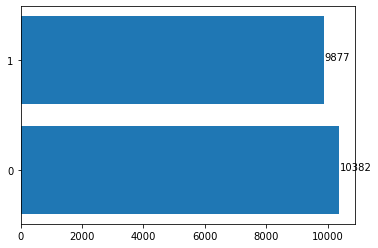

In [17]:
import matplotlib.pyplot as plt

x = ["0", "1"]
y = [len(data[data['label'] == 0 ]),len(data[data['label'] == 1 ])]
plt.barh(x, y)

for index, value in enumerate(y):
  plt.text(value, index, str(value))
    

## Merging the texts in corpus for word cloud

In [18]:
# converted corpus into ndArray
corpus_no_stop_0 = []
corpus_no_stop_1 = []
for i in range(0, len(corpus_0)):
    news = corpus_0[i].split()     # Spliting sentence into words to remove stopwords
    news = [wl.lemmatize(word) for word in news if not word in stopwords.words('english')]   #Performing Lemmatization & Removing stopwords from the sentence
    news = ' '.join(news)   # Rejoin the word to make a sentence and store it into corpus array
    corpus_no_stop_0.append(news)

print("corpus_no_stop_0 : ",len(corpus_no_stop_0))

corpus_no_stop_0 :  10382


In [19]:
# converted corpus into ndArray
for i in range(0, len(corpus_1)):
    news = corpus_1[i].split()     # Spliting sentence into words to remove stopwords
    news = [wl.lemmatize(word) for word in news if not word in stopwords.words('english')]    #Performing Lemmatization & Removing stopwords from the sentence
    news = ' '.join(news)   # Rejoin the word to make a sentence and store it into corpus array
    corpus_no_stop_1.append(news)

print("corpus_no_stop_1 : ",len(corpus_no_stop_1))

corpus_no_stop_1 :  9877


In [47]:
lab = np.concatenate((np.zeros((10382,), dtype=int),np.ones((9877,), dtype=int)), axis=0)
corp_to_df = corpus_no_stop_0+corpus_no_stop_1
print(lab)

[0 0 0 ... 1 1 1]


In [92]:
df_re_0 = pd.DataFrame(data=corp_to_df, columns=["lem_text"])
df_re_0['label'] = lab
print(df_re_0.shape)
df_re_0.to_csv("lemmetized_data.csv")

(20259, 2)


In [100]:
corpus_no_stop_1[8146]

''

In [52]:
word_cloud_0 = ' '.join(corpus_no_stop_0)    # derived associated fake news titles from corpus and merge it into one string
word_cloud_1 = ' '.join(corpus_no_stop_1)    # derived associated reliable news titles from corpus and merge it into one string

print("word_cloud_0 : ",len(word_cloud_0.split()),"\nword_cloud_1 : ",len(word_cloud_1.split()))

word_cloud_0 :  5069709 
word_cloud_1 :  3543319


## Word frequency in all the news titles

 Before removing duplicates from real news words :  5069709 
After removing duplicates from real news words :  82726
 Before removing duplicates from fake news words :  3543319 
After removing duplicates from fake news words :  70367

size of unique real words without duplicates :  40544 
size of unique fake words without duplicates :  28185

Length of unique real words :  121993

Length of unique fake words :  75160


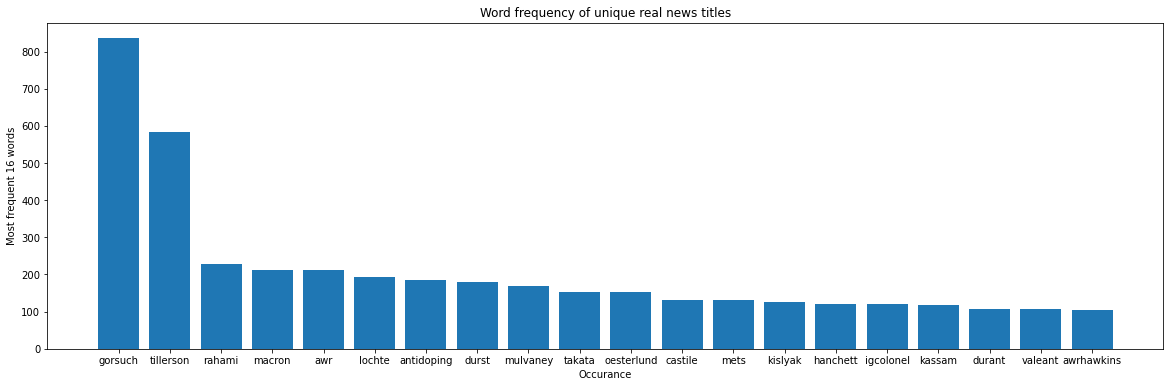

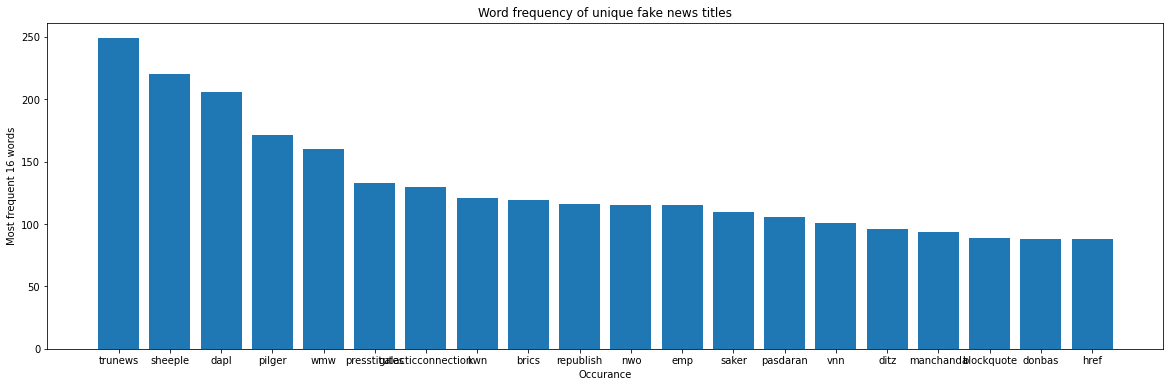

In [54]:
# creating sets of fake and real news' titles 
# by creating set it removes duplicates

words_0 = set(word_cloud_0.split())
words_1 = set(word_cloud_1.split())
print(" Before removing duplicates from real news words : ", len(word_cloud_0.split()),"\nAfter removing duplicates from real news words : ",len(words_0))
print(" Before removing duplicates from fake news words : ", len(word_cloud_1.split()),"\nAfter removing duplicates from fake news words : ",len(words_1))
# print("set of real news titles : ",words_0," : \nset of fake news titles : ",words_1)

unique_words_0 = words_0 - words_1
unique_words_1 = words_1 - words_0

# print("Unique real words : ", unique_words_0, "\nUnique fake words : ", unique_words_1)
print("\nsize of unique real words without duplicates : ", len(unique_words_0), "\nsize of unique fake words without duplicates : ", len(unique_words_1))

# unique_real_set_list = list(unique_words_0)
# unique_fake_set_list = list(unique_words_1)

unique_real_list = [word for word in word_cloud_0.split() if word in unique_words_0]
unique_fake_list = [word for word in word_cloud_1.split() if word in unique_words_1]

print("\nLength of unique real words : ",len(unique_real_list))
print("\nLength of unique fake words : ",len(unique_fake_list))

unique_real_string = ' '.join(unique_real_list)
unique_fake_string = ' '.join(unique_fake_list)

# function to get word count in a sentence
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

# sort the dictionary with word count decendent order
def sort_the_dictionary(dictionary):
  return dict(sorted(word_count(dictionary).items(), key=lambda item: item[1], reverse = True))


# getting top 16 records of dictionary
def get_top_16(all_words_count,digit):
  doc = dict()
  c = 0
  for kay in all_words_count:  
    doc[kay] = all_words_count[kay]
    c=c+1
    if c  == digit:
      break;
  return doc


# plot the bar chart from the list
def plot_the_graph(word_count_list,title,digit):
  plt.figure (figsize=(20, 6))
  plt.bar(get_top_16(word_count_list,digit).keys(),get_top_16(word_count_list,digit).values())
  plt.title(title)
  plt.xlabel('Occurance')
  plt.ylabel('Most frequent 16 words')
  plt.show()

# unique real words frequency
sorted_unique_dictionary_real = sort_the_dictionary(unique_real_string)
plot_the_graph(sorted_unique_dictionary_real,'Word frequency of unique real news titles',20)

# unique fake words frequency
sorted_unique_dictionary_fake = sort_the_dictionary(unique_fake_string)
plot_the_graph(sorted_unique_dictionary_fake,'Word frequency of unique fake news titles',20)



## Displaying number of words present into headlines of all the data

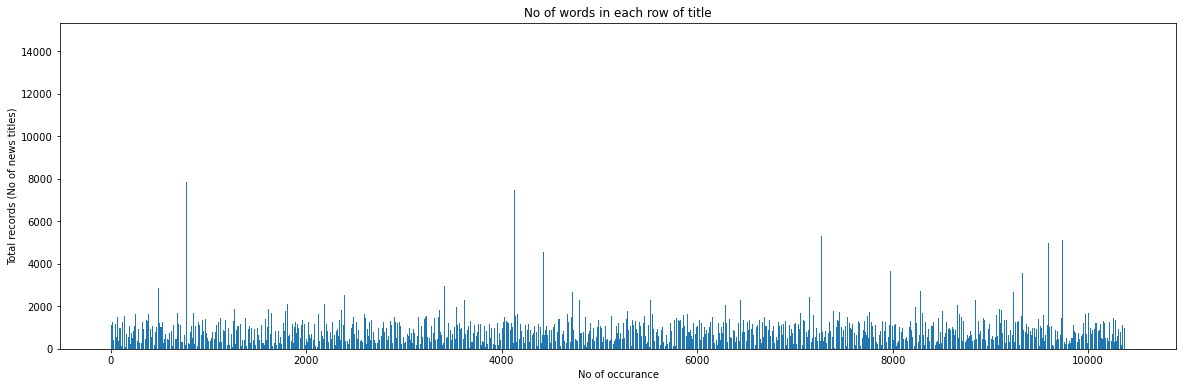

In [55]:
words_arr = np.char.split(corpus_0)
counts = []

for list in words_arr:
  counts.append(len(list))

plt.figure (figsize=(20, 6))
plt.bar(range(0, len(counts)), counts)
plt.title('No of words in each row of title')
plt.xlabel('No of occurance')
plt.ylabel('Total records (No of news titles)')
plt.show()

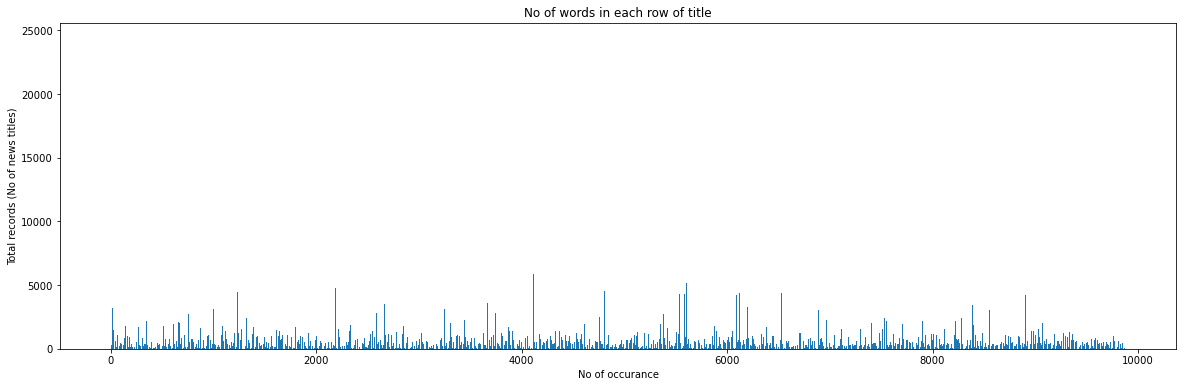

In [56]:
words_arr = np.char.split(corpus_1)
counts = []

for list in words_arr:
  counts.append(len(list))

plt.figure (figsize=(20, 6))
plt.bar(range(0, len(counts)), counts)
plt.title('No of words in each row of title')
plt.xlabel('No of occurance')
plt.ylabel('Total records (No of news titles)')
plt.show()

## Creating wordcloud of Fake and reliable news headlines

In [57]:
!pip install wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1500, height = 1500,
                background_color ='white', collocations=False,
                min_font_size = 10, max_words=20000).generate(unique_real_string)

wordcloud_1 = WordCloud(width = 1500, height = 1500,
                background_color ='white', collocations=False,
                min_font_size = 10, max_words=20000).generate(unique_fake_string)                


In [58]:
wordcloud.words_

{'gorsuch': 1.0,
 'tillerson': 0.6973684210526315,
 'rahami': 0.27631578947368424,
 'macron': 0.2535885167464115,
 'awr': 0.25239234449760767,
 'lochte': 0.23086124401913877,
 'antidoping': 0.22248803827751196,
 'durst': 0.21650717703349281,
 'mulvaney': 0.20334928229665072,
 'takata': 0.18421052631578946,
 'oesterlund': 0.18181818181818182,
 'castile': 0.15669856459330145,
 'mets': 0.15669856459330145,
 'airbag': 0.15311004784688995,
 'kislyak': 0.1519138755980861,
 'hanchett': 0.14473684210526316,
 'igcolonel': 0.14473684210526316,
 'kassam': 0.14114832535885166,
 'durant': 0.1291866028708134,
 'valeant': 0.12679425837320574,
 'awrhawkins': 0.1255980861244019,
 'oakley': 0.1255980861244019,
 'grammys': 0.11842105263157894,
 'sotheby': 0.11602870813397129,
 'tamaulipas': 0.11483253588516747,
 'manchin': 0.11363636363636363,
 'zinke': 0.11363636363636363,
 'anbang': 0.11244019138755981,
 'perdue': 0.11124401913875598,
 'kew': 0.11004784688995216,
 'sarsour': 0.1076555023923445,
 'bkew'

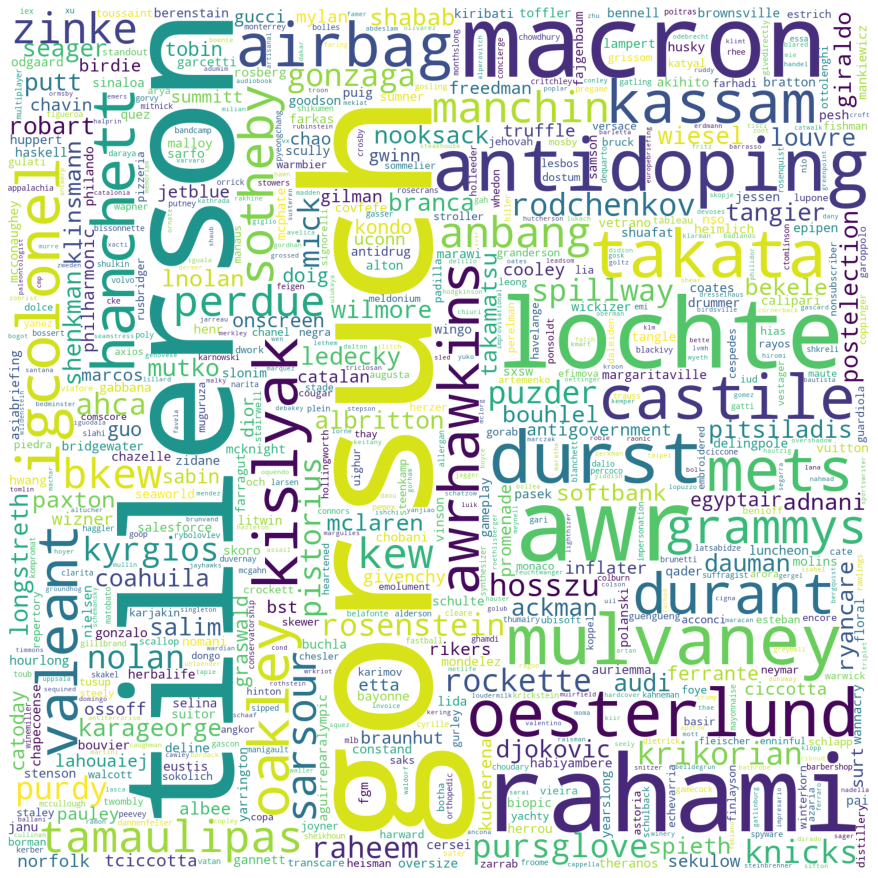

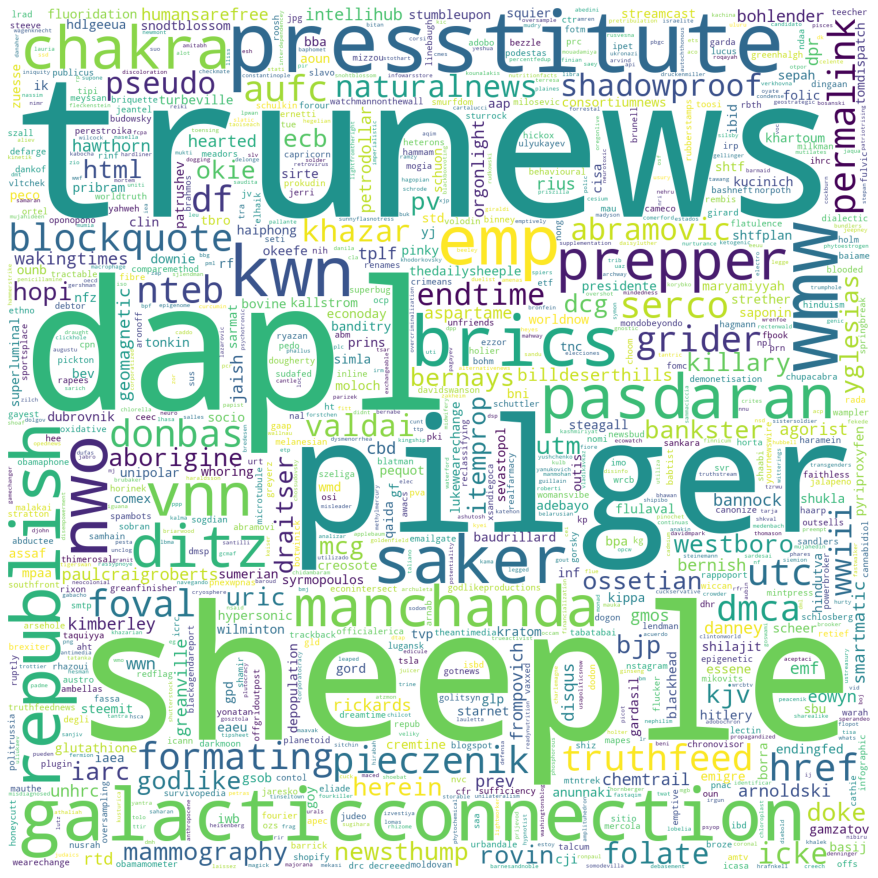

In [59]:
# plot the WordCloud image of reliable news                    
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

print('\n\n\n')
# plot the WordCloud image of fake news                    
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud_1)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


# Now we will convert this text to TF-IDF vector

In [1]:
import pandas as pd

df_lem = pd.read_csv('lemmetized_data.csv')
df_lem = df_lem.drop('Unnamed: 0',axis=1)
df_lem.shape
df_lem.isnull().sum()
df_lem = df_lem.dropna()
print(df_lem.isnull().sum())
print(df_lem['label'].value_counts())

lem_text    0
label       0
dtype: int64
0    10382
1     9360
Name: label, dtype: int64


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_lem['lem_text'], df_lem['label'], test_size=0.25, random_state=47)
print('X_train.shape : ',X_train.shape)
print('y_test.shape : ',y_test.shape)

X_train.shape :  (14806,)
y_test.shape :  (4936,)


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(ngram_range=(1, 2))
X_train_tf = cv.fit_transform(X_train)
X_test_tf = cv.transform(X_test)
X_train_tf.shape

(14806, 3318115)

In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np


In [5]:
nb_classifier = MultinomialNB(alpha = 0.1)
nb_classifier.fit(X_train_tf, y_train)
y_pred_tf = nb_classifier.predict(X_test_tf)
acc_nb_tfidf = accuracy_score(y_test, y_pred_tf)
print(acc_nb_tfidf)

0.9080226904376013


In [6]:
# tune the hyperparameter alpha for the naive bayes classifier
for alpha in np.arange(0,0.1,.01):
    nb_classifier_tune = MultinomialNB(alpha=alpha)
    nb_classifier_tune.fit(X_train_tf, y_train)
    y_pred_tune = nb_classifier_tune.predict(X_test_tf)
    score = accuracy_score(y_test, y_pred_tune)
    print("Alpha: {:.2f}  Score: {:.5f}".format(alpha, score))

C:\Users\baps\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.00  Score: 0.88128
Alpha: 0.01  Score: 0.93395
Alpha: 0.02  Score: 0.93193
Alpha: 0.03  Score: 0.92808
Alpha: 0.04  Score: 0.92585
Alpha: 0.05  Score: 0.92119
Alpha: 0.06  Score: 0.91694
Alpha: 0.07  Score: 0.91511
Alpha: 0.08  Score: 0.91248
Alpha: 0.09  Score: 0.91025


In [7]:
nb_classifier = MultinomialNB(alpha = 0.01)
nb_classifier.fit(X_train_tf, y_train)
y_pred_tf = nb_classifier.predict(X_test_tf)
acc_nb_tfidf = accuracy_score(y_test, y_pred_tf)
print(acc_nb_tfidf)

0.9339546191247974


In [8]:
import matplotlib.pyplot as plt
# Computations
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

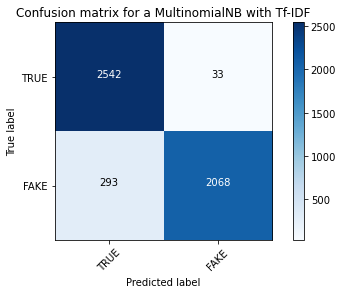

In [9]:
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test, y_pred_tf)
confusion_m
plot_confusion_matrix(confusion_m, classes=['TRUE','FAKE'], title ='Confusion matrix for a MultinomialNB with Tf-IDF')

In [34]:
import pickle
pickle_out = open('naive_bayes.pkl','wb')
pickle.dump(nb_classifier, pickle_out)
pickle_out.close()

## Passive Agressive Classifier With Count Vectorizer

0.9671799027552674


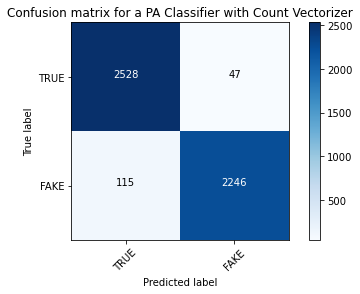

In [10]:
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier
linear_classifier = PassiveAggressiveClassifier(max_iter=10)
linear_classifier.fit(X_train_tf, y_train)
pred_linear_count = linear_classifier.predict(X_test_tf)
acc_linear_count = metrics.accuracy_score(y_test, pred_linear_count)
print(acc_linear_count)
cm6 = metrics.confusion_matrix(y_test, pred_linear_count, labels=[0,1])
plot_confusion_matrix(cm6, classes=['TRUE','FAKE'], title ='Confusion matrix for a PA Classifier with Count Vectorizer')


In [35]:
pickle_out_2 = open('passive_agressive_classifier.pkl','wb')
pickle.dump(linear_classifier, pickle_out_2)
pickle_out_2.close()

## Randomforest with TF-IDF

0.9120745542949756


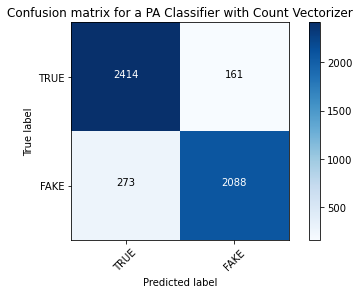

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_tf, y_train)
rf_y_pred=clf.predict(X_test_tf)
acc_random_forest = metrics.accuracy_score(y_test, rf_y_pred)
print(acc_random_forest)
cm6 = metrics.confusion_matrix(y_test, rf_y_pred, labels=[0,1])
plot_confusion_matrix(cm6, classes=['TRUE','FAKE'], title ='Confusion matrix for a PA Classifier with Count Vectorizer')


In [36]:
pickle_out_3 = open('random_forest.pkl','wb')
pickle.dump(clf, pickle_out_3)
pickle_out_3.close()

## Logistic regression with TF-IDF

C:\Users\baps\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9657617504051864


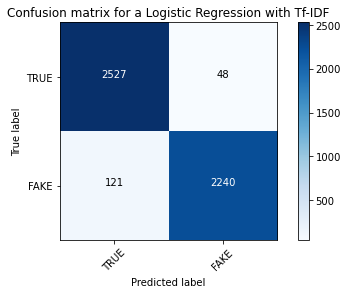

In [12]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train_tf, y_train)
pred_logreg_tfidf = logreg.predict(X_test_tf)
pred_logreg_tfidf_proba = logreg.predict_proba(X_test_tf)[:,1]
acc_logreg_tfidf = metrics.accuracy_score(y_test,pred_logreg_tfidf)
print(acc_logreg_tfidf)
cm4 = metrics.confusion_matrix(y_test, pred_logreg_tfidf, labels=[0,1])
plot_confusion_matrix(cm4, classes=['TRUE','FAKE'], title ='Confusion matrix for a Logistic Regression with Tf-IDF')

In [37]:
pickle_out_4 = open('logistic.pkl','wb')
pickle.dump(logreg, pickle_out_4)
pickle_out_4.close()

# Performing LSTM 

In [15]:
df_only_title = df.copy()
df_only_title = df_only_title.loc[(df_only_title['Language'] == 'eng') | (df_only_title['Language'] == 'eng ')]
df_only_title.head(10)

,id,title,author,text,label,total,Language
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...,eng
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",eng
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Why the Trut...,eng
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...,eng
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...,eng
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,Jackie Mason: Hollywood Would Love Trump if He...,eng
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1,Life: Life Of Luxury: Elton John’s 6 Favorite ...,eng
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,Benoît Hamon Wins French Socialist Party’s Pre...,eng
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0,Excerpts From a Draft Script for Donald Trump’...,eng
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,"A Back-Channel Plan for Ukraine and Russia, Co...",eng


In [16]:
df_only_title = df_only_title.drop(['author','text','total','Language'], axis=1)
df_only_title.head(10)

,id,title,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,2,Why the Truth Might Get You Fired,1
3,3,15 Civilians Killed In Single US Airstrike Hav...,1
4,4,Iranian woman jailed for fictional unpublished...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,0
8,8,Excerpts From a Draft Script for Donald Trump’...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",0


In [17]:
df_only_title.isnull().sum()

id         0
title    513
label      0
dtype: int64

In [18]:
df_only_title = df_only_title.dropna()

In [19]:
print(df_only_title.isnull().sum())
print(len(df_only_title))
df_only_title.reset_index(inplace=True)

id       0
title    0
label    0
dtype: int64
19746


In [22]:
corpus=[]
for i in range(0,len(df_only_title)):
    review = re.sub('[^a-zA-Z]', ' ', df_only_title['title'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(words) for words in review if not words in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [23]:
# importing tensorflow
import tensorflow as tf

# vectorize the text samples into a 2D integer tensor.
tokenizer_obj = tf.keras.preprocessing.text.Tokenizer()
tokenizer_obj.fit_on_texts(corpus)

# word_index stores the length of unique words.
word_index = tokenizer_obj.word_index

In [24]:
vocab_len = len(word_index) + 1
vocab_len

13712

In [25]:
# generating X and y
X = corpus
y = df_only_title['label']

In [26]:
# in order to pass the data to Embedding layer we need to make the size of the input equal.
# So we created data of 100 features by adding padding sequences.
max_length = 100

# texts_to_sequence will create a numbered data of the sentence 
X = tokenizer_obj.texts_to_sequences(X)

# pad_sequences will add padding and create an array of a fixed size here it is 100
embedded_docs = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=max_length)
# transfering review_pad into X_review_pad which will go directly into the embedding layer of our sequencial model.
X_embedd = embedded_docs
print(X_embedd)

[[   0    0    0 ... 1505 2705  424]
 [   0    0    0 ...  133 1169    5]
 [   0    0    0 ...  879   33   83]
 ...
 [   0    0    0 ...    1    3    2]
 [   0    0    0 ... 4349 2601 4481]
 [   0    0    0 ...  224  149 1382]]


In [27]:
from sklearn.model_selection import train_test_split
X_train_lstm , X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_embedd, y, test_size=0.25, random_state=47)

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.layers.embeddings import Embedding

EMBEDDING_DIM = 100

print('Build model...')

model = Sequential()
# embedding layer to embedd the data
model.add(Embedding(vocab_len, EMBEDDING_DIM, input_length=max_length))
# Deep LSTM layer with 40 units
model.add(LSTM(units=20, dropout=0.4, recurrent_dropout=0.3))
# dence layer with 1 output either 0 or 1
model.add(Dense(1, activation='sigmoid'))

#try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print('Summary of the built model...')
print(model.summary())


Build model...
Summary of the built model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1371200   
_________________________________________________________________
lstm (LSTM)                  (None, 20)                9680      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 1,380,901
Trainable params: 1,380,901
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
print('Train...')
model.fit(X_train_lstm, y_train_lstm, batch_size=128, epochs=30, validation_data=(X_test_lstm, y_test_lstm), verbose=2)

Train...
Epoch 1/30
116/116 - 68s - loss: 0.4112 - accuracy: 0.8583 - val_loss: 0.2057 - val_accuracy: 0.9176
Epoch 2/30
116/116 - 23s - loss: 0.1442 - accuracy: 0.9466 - val_loss: 0.1683 - val_accuracy: 0.9338
Epoch 3/30
116/116 - 23s - loss: 0.0835 - accuracy: 0.9720 - val_loss: 0.1832 - val_accuracy: 0.9283
Epoch 4/30
116/116 - 23s - loss: 0.0545 - accuracy: 0.9841 - val_loss: 0.1956 - val_accuracy: 0.9319
Epoch 5/30
116/116 - 23s - loss: 0.0352 - accuracy: 0.9900 - val_loss: 0.2206 - val_accuracy: 0.9309
Epoch 6/30
116/116 - 23s - loss: 0.0280 - accuracy: 0.9920 - val_loss: 0.2371 - val_accuracy: 0.9285
Epoch 7/30
116/116 - 22s - loss: 0.0214 - accuracy: 0.9943 - val_loss: 0.2529 - val_accuracy: 0.9332
Epoch 8/30
116/116 - 23s - loss: 0.0185 - accuracy: 0.9949 - val_loss: 0.2726 - val_accuracy: 0.9265
Epoch 9/30
116/116 - 22s - loss: 0.0138 - accuracy: 0.9966 - val_loss: 0.2872 - val_accuracy: 0.9259
Epoch 10/30
116/116 - 24s - loss: 0.0108 - accuracy: 0.9970 - val_loss: 0.3082 - v

In [30]:
y_pred_lstm = model.predict_classes(X_test_lstm)

C:\Users\baps\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


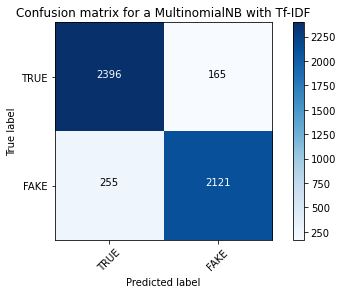

In [31]:
from sklearn.metrics import confusion_matrix
confusion_ma = confusion_matrix(y_test_lstm, y_pred_lstm)
confusion_ma
plot_confusion_matrix(confusion_ma, classes=['TRUE','FAKE'], title ='Confusion matrix for a MultinomialNB with Tf-IDF')

In [38]:
model.save('fake_news_lstm.h5')